In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

# Path to the CSV file containing employee salary data
data_file_path = 'IL_employee_salary.csv'

In [2]:
# Load the CSV data into a DataFrame and remove rows with NaN values
data = pd.read_csv(data_file_path).dropna()

# Extract annual salary data as integers
annual_salaries = data['Annual Salary'].astype(int)

#print(annual_salaries)

In [3]:
# Determine the minimum and maximum salary bin values
min_salary_bin, max_salary_bin = (min(annual_salaries) // 1000) * 1000, ((max(annual_salaries) // 1000) + 1) * 1000

# Define the interval width for the salary bins
bin_interval = 10000

# Create an array to store the histogram bins
histogram_bins = []

# Initialize the starting point for the interval
interval_start = min_salary_bin

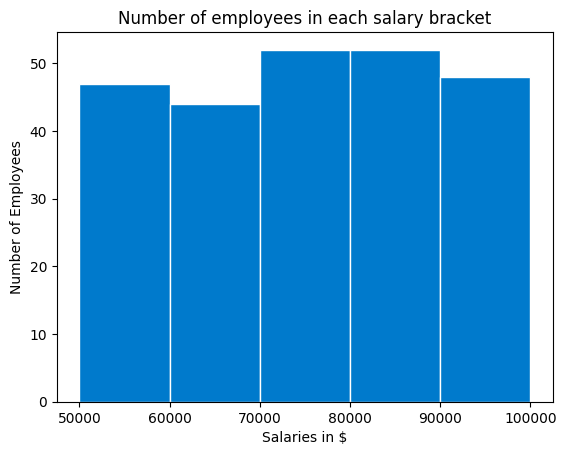

In [4]:
# Generate the histogram bins
for index in range(((max_salary_bin - min_salary_bin) // bin_interval) + 1):
    histogram_bins.append(interval_start)
    interval_start += bin_interval

# Plot the histogram using the salary data
annual_salaries = np.array(annual_salaries)
salary_histogram, bins, patches = plt.hist(annual_salaries, bins=histogram_bins, facecolor='#007acc', edgecolor='white')
plt.xlabel('Salaries in $')
plt.ylabel('Number of Employees')
plt.title('Number of employees in each salary bracket')
plt.show()


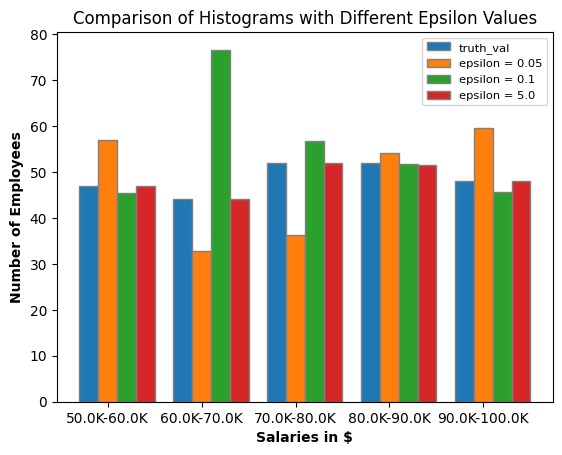

In [5]:
#np.random.seed(123)
location = 0.
epsilon_values = [0.05, 0.1, 5.0]
perturbed_histogram = []

# Apply ε-differential privacy to the histogram for each epsilon value
for epsilon in epsilon_values:
    scale = 1/epsilon
    laplace_noise = np.random.laplace(location, scale, len(bins)-1)

    # Perturb the original histogram with Laplace laplace_noise
    original_copy = salary_histogram.copy()
    for index in range(len(original_copy)):
        original_copy[index] += laplace_noise[index]
    perturbed_histogram.append(original_copy)

barWidth = 0.20
epsilon0 = salary_histogram.copy()
epsilon1 = perturbed_histogram[0]
epsilon2 = perturbed_histogram[1]
epsilon3 = perturbed_histogram[2]

r1 = np.arange(len(epsilon0))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

plt.bar(r1, epsilon0, color='#1f77b4', width=barWidth, edgecolor='grey', label = 'truth_val')
plt.bar(r2, epsilon1, color='#ff7f0e', width=barWidth, edgecolor='grey', label = 'epsilon = 0.05')
plt.bar(r3, epsilon2, color='#2ca02c', width=barWidth, edgecolor='grey', label = 'epsilon = 0.1')
plt.bar(r4, epsilon3, color='#d62728', width=barWidth, edgecolor='grey', label = 'epsilon = 5.0')

plt.title('Comparison of Histograms with Different Epsilon Values')
plt.ylabel('Number of Employees', fontweight = 'bold')
plt.xlabel('Salaries in \$', fontweight='bold')
intrvl1 = str(bins[0]//1000)+'K'+'-'+str(bins[1]//1000)+'K'
intrvl2 = str(bins[1]//1000)+'K'+'-'+str(bins[2]//1000)+'K'
intrvl3 = str(bins[2]//1000)+'K'+'-'+str(bins[3]//1000)+'K'
intrvl4 = str(bins[3]//1000)+'K'+'-'+str(bins[4]//1000)+'K'
intrvl5 = str(bins[4]//1000)+'K'+'-'+str(bins[5]//1000)+'K'

plt.xticks([r + barWidth for r in range(len(epsilon1))], [intrvl1, intrvl2,intrvl3,intrvl4,intrvl5 ])
plt.legend(loc=1, prop={'size': 8.25})
plt.show()
